In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

/Users/MattKasle/Matt/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [2]:
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
input_data_mileage = df[["Mileage"]]
price = df["Price"]

regr = linear_model.LinearRegression()


In [5]:
regr.fit(input_data_mileage, price)

linear_equation = "y = {}x + {}".format(regr.coef_[0], regr.intercept_)
print(linear_equation)

y = -0.17252050279124917x + 24764.55900606168


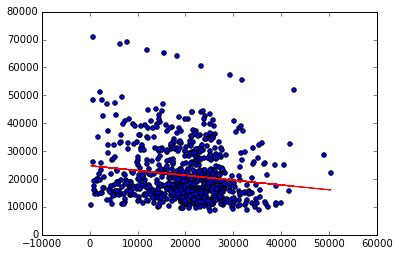

In [6]:
plt.scatter(input_data_mileage, price)
plt.plot(input_data_mileage, regr.predict(input_data_mileage), color = "Red")

In [7]:
print("R^2 score for mileage: {}".format(regr.score(input_data_mileage, price)))

R^2 score for mileage: 0.02046344732348948


Data mileage is a very weak indicator by itself.

In [8]:
input_data = df[["Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"]]

In [9]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [10]:
regr = linear_model.LinearRegression()

In [11]:
regr.fit(input_data, price)
print(regr.coef_)
print(regr.intercept_)

[ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03]
6758.7551436


In [12]:
regr.score(input_data, price)

0.44626435367283801

Mileage, cylinders, liters, doors, cruise, sound, and leather together do not provide a very good indicator of car price. This is likely because a car's make and model have very much to do with the price as well.

In [13]:
import itertools

In [14]:
dependent_vars = list(df.columns)
dependent_vars.remove("Price")
dependent_vars.remove("Make")
dependent_vars.remove("Model")
dependent_vars.remove("Trim")
dependent_vars.remove("Type")

In [15]:
combos = list(itertools.combinations(dependent_vars, 2))

In [54]:
choices = []

def regression_for(combo):
    combo = list(combo)
    df1 = df.loc[:, combo + ['Price']]
    df1.dropna(inplace=True)
    input_data = df1[combo]
    salary = df1['Price']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, salary)
    return regr, regr.score(input_data, salary)

for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))


In [17]:
choices = sorted(choices, key=lambda x: x[1])
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)

(('Cylinder', 'Cruise'), 0.38394913240273443)


Cylinder and cruise are the best two indicators when combined, but only at an r squared score of .38. Cylinder makes sense since cars with 6 cylinder engines are typically nicer and more expensive. However, cruise is an interseting parameter. I will now increase the number of variable combinations to 3. 

In [18]:
combos = list(itertools.combinations(dependent_vars, 3))

In [19]:
choices = sorted(choices, key=lambda x: x[1])
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)

(('Cylinder', 'Cruise'), 0.38394913240273443)


Now, leather joins cylinder and cruise as the best group indicators.

In [20]:
combos = list(itertools.combinations(dependent_vars, 4))

In [21]:
choices = sorted(choices, key=lambda x: x[1])
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)

(('Cylinder', 'Cruise'), 0.38394913240273443)


With four variables, mileage joins cylinder, cruise, and leather to bump up ther squared score to .422. It's interesting that mileage only comes up now, clearing meaning that other variables have more impact on price when not including any information on the make or model. 

# Hard Mode

In [22]:
from sklearn import preprocessing 
from sklearn.feature_extraction import DictVectorizer 

In [43]:
for column in ['Type', 'Make', "Model"]:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns] = dummies
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Buick', 'Cadillac',
       'Chevrolet', 'Pontiac', 'SAAB', 'Saturn', '9-2X AWD', '9_3', '9_3 HO',
       '9_5', '9_5 HO', 'AVEO', 'Bonneville', 'CST-V', 'CTS', 'Cavalier',
       'Century', 'Classic', 'Cobalt', 'Corvette', 'Deville', 'G6', 'GTO',
       'Grand Am', 'Grand Prix', 'Impala', 'Ion', 'L Series', 'Lacrosse',
       'Lesabre', 'Malibu', 'Monte Carlo', 'Park Avenue', 'STS-V6', 'STS-V8',
       'Sunfire', 'Vibe', 'XLR-V8', 'Convertible', 'Coupe', 'Hatchback',
       'Sedan', 'Wagon'],
      dtype='object')

In [46]:
dependent_vars = list(df.columns)
dependent_vars.remove("Price")
dependent_vars.remove("Make")
dependent_vars.remove("Model")
dependent_vars.remove("Trim")
dependent_vars.remove("Type")

In [53]:
combos = list(itertools.combinations(dependent_vars, 2))

In [51]:
choices = []

def regression_for(combo):
    combo = list(combo)
    df1 = df.loc[:, combo + ['Price']]
    df1.dropna(inplace=True)
    input_data = df1[combo]
    salary = df1['Price']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, salary)
    return regr, regr.score(input_data, salary)

for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))

(('Cylinder', 'Cruise'), 0.38394913240273443)


In [74]:
choices = sorted(choices, key=lambda x: x[1])
best = sorted(choices, key=lambda x: x[1])[-4:]
print(best)

[(('Liter', 'SAAB'), 0.61166951647415702), (('Cadillac', 'SAAB'), 0.61821063511642482), (('Cadillac', 'Convertible'), 0.6396211642648606), (('Cylinder', 'SAAB'), 0.67113089332616738)]


We see that cylinder and SAAB are the two highest indicators for car price.